In [ ]:
from astropy.io import fits
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename, download_file 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from astroquery.mast import Mast
from astroquery.mast import Observations

In [ ]:
keplerObs = Observations.query_criteria(target_name='kplr010748390', obs_collection='Kepler')
keplerProds = Observations.get_product_list(keplerObs[1])
keplerProds['productFilename']


kplr010748390-2013017113907_slc_bw_large.png
kplr010748390_tpf_sc_Q113333300330333032.tar
kplr010748390_sc_Q113333300330333032.tar
kplr010748390-2009131110544_slc.fits
kplr010748390-2009166044711_slc.fits
kplr010748390-2009201121230_slc.fits
kplr010748390-2009231120729_slc.fits
kplr010748390-2009259162342_slc.fits
kplr010748390-2009291181958_slc.fits
kplr010748390-2009322144938_slc.fits
kplr010748390-2009350160919_slc.fits


In [ ]:
yourProd = Observations.filter_products(keplerProds, extension='kplr010748390-2009166044711_slc.fits', 
                                        mrp_only=False)
Observations.download_products(yourProd, mrp_only = False, cache = False)

Local Path,Status,Message,URL
str95,str8,object,object
./mastDownload\Kepler\kplr010748390_sc_Q113333300330333032\kplr010748390-2009166044711_slc.fits,COMPLETE,None,None


In [ ]:
filename = './mastDownload\Kepler\kplr010748390_sc_Q113333300330333032\kplr010748390-2009166044711_slc.fits'
fits.info(filename)

Filename: ./mastDownload\Kepler\kplr010748390_sc_Q113333300330333032\kplr010748390-2009166044711_slc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   49170R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (11, 18)   int32   


In [ ]:
with fits.open(filename) as hdulist:
    binaryext = hdulist[1].data

binarytable = Table(binaryext)
binarytable[1:6]

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
131.5025390729934,0.000740333,21611,2930590.8,235.63206,6899.7964,2.2150457,2918736.2,258.02878,0,nan,nan,nan,nan,555.5769809054419,6.571702e-05,821.8604178023097,0.00019389723,-0.00040875177,0.025886685
131.5032201990689,0.0007403591,21612,2930419.8,235.62138,6899.297,2.2150578,2918544.8,257.4873,0,nan,nan,nan,nan,555.5770000349214,6.57209e-05,821.8614594134473,0.00019388014,-0.00041138695,0.025888523
131.50390142514516,0.00074038515,21613,2930852.5,235.64854,6898.796,2.21507,2918959.0,257.08865,128,nan,nan,nan,nan,555.5772042021242,6.5717955e-05,821.8617519987315,0.00019397747,-0.0004140225,0.02589036
131.5045824512854,0.0007404113,21614,2930517.2,235.6262,6898.2964,2.2150822,2918603.8,256.74185,0,nan,nan,nan,nan,555.5777473522814,6.571488e-05,821.8610663135942,0.0001939636,-0.0004166573,0.025892196
131.5052635773609,0.00074043736,21615,2930231.0,235.61859,6897.7964,2.215094,2918298.0,256.49405,0,nan,nan,nan,nan,555.5770968242167,6.573298e-05,821.8602354197824,0.00019393064,-0.00041929248,0.025894033


In [ ]:
with fits.open(filename, mode="readonly") as hdulist:
    # Read the the offset of the time array.
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']

    # Read the columns of data.
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

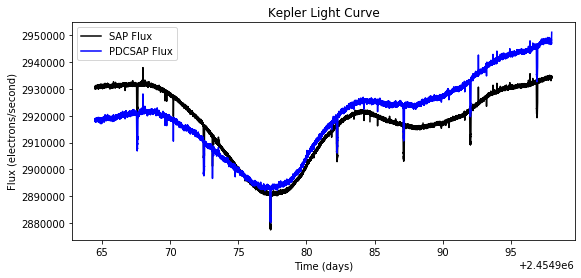

In [ ]:
# Convert the time array to full BJD by adding the offset back in.
bjds = times + bjdrefi + bjdreff 

plt.figure(figsize=(9,4))

# Plot the time, uncorrected and corrected fluxes.
plt.plot(bjds, sap_fluxes, '-k', label='SAP Flux') 
plt.plot(bjds, pdcsap_fluxes, '-b', label='PDCSAP Flux') 

plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()

In [ ]:
yourProd = Observations.filter_products(keplerProds,extension='kplr010748390-2012121044856_spd-targ.fits.gz',
                                        mrp_only=False)
Observations.download_products(yourProd, mrp_only=False, cache=False)

Local Path,Status,Message,URL
str103,str8,object,object
./mastDownload\Kepler\kplr010748390_sc_Q113333300330333032\kplr010748390-2012121044856_spd-targ.fits.gz,COMPLETE,None,None


In [ ]:
filename = "./mastDownload\Kepler\kplr010748390_sc_Q113333300330333032\kplr010748390-2012121044856_spd-targ.fits.gz"
fits.info(filename)

Filename: ./mastDownload\Kepler\kplr010748390_sc_Q113333300330333032\kplr010748390-2012121044856_spd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    287   47370R x 13C   [D, E, J, 242J, 242E, 242E, 242E, 242E, 242E, J, E, E, 110E]   
  2  APERTURE      1 ImageHDU        48   (11, 22)   int32   


In [ ]:
with fits.open(filename) as hdulist:
    binaryext = hdulist[1].data

binarytab = Table(binaryext)
binarytab[0:4]

TIME,TIMECORR,CADENCENO,"RAW_CNTS [22,11]","FLUX [22,11]","FLUX_ERR [22,11]","FLUX_BKG [22,11]","FLUX_BKG_ERR [22,11]","COSMIC_RAYS [22,11]",QUALITY,POS_CORR1,POS_CORR2,"RB_LEVEL [22,5]"
float64,float32,int32,int32,float32,float32,float32,float32,float32,int32,float32,float32,float32
1182.7267527003933,-0.0012420396,1564990,-1 .. -1,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,0,-0.011665644,-0.035072982,0.3314021 .. 0.15530263
1182.727433813081,-0.0012420269,1564991,-1 .. -1,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,0,-0.011673756,-0.03511223,0.3314021 .. 0.15530263
1182.7281150257695,-0.0012420142,1564992,-1 .. -1,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,0,-0.011681869,-0.035151485,0.3314021 .. 0.15530263
1182.7287961384573,-0.0012420015,1564993,-1 .. -1,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,0,-0.0116899805,-0.03519073,0.3314021 .. 0.15530263


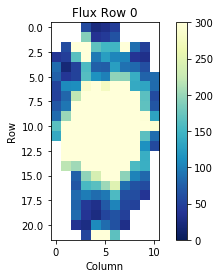

In [ ]:
binarytab['FLUX'][0]
plt.title('Flux Row 0')
plt.xlabel('Column')
plt.ylabel('Row')

plt.imshow(binarytab['FLUX'][0], cmap=plt.cm.YlGnBu_r)
plt.colorbar()
plt.clim(0,300)

Custom Aperture photometry

In [3]:
import lightkurve as lk
import numpy as np
import matplotlib as plt
%matplotlib inline

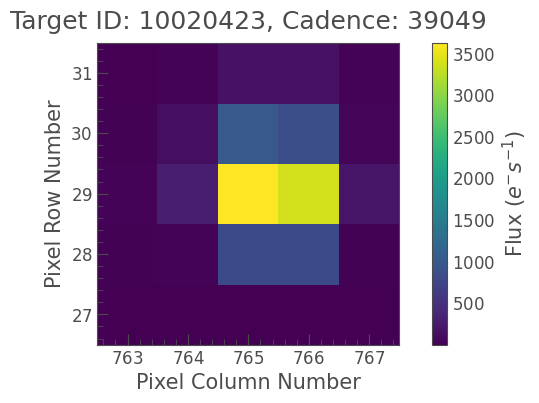

In [4]:
tpf_example = lk.search_targetpixelfile("KIC 10020423", mission="Kepler", cadence='long', quarter=10).download()
tpf_example.plot();

1. Pipeline Aperture Photometry

Star :
Kepler-47 A
KIC 10020423 A, KOI-3154 A


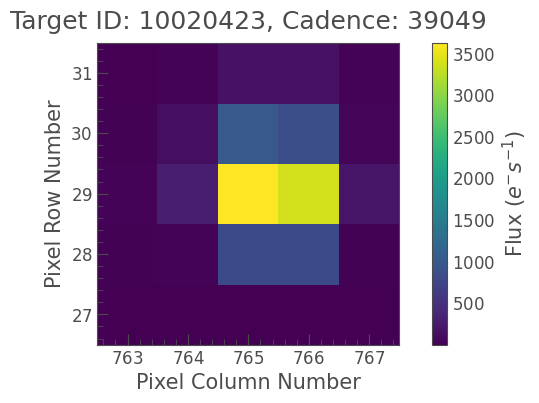

In [8]:
tpf = lk.search_targetpixelfile("KIC 10020423", mission="Kepler", cadence="long", quarter=10).download(quality_bitmask="hard")
tpf.plot();

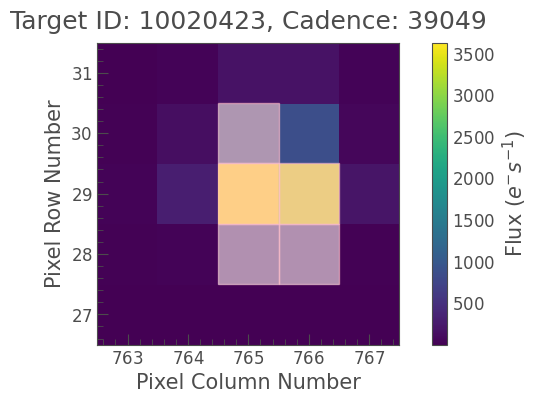

In [9]:
tpf.plot(aperture_mask='pipeline');

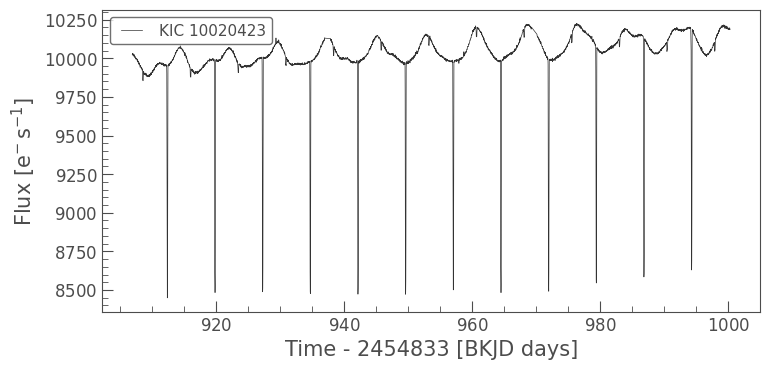

In [10]:
lc = tpf.to_lightcurve(aperture_mask="pipeline")
lc.plot();

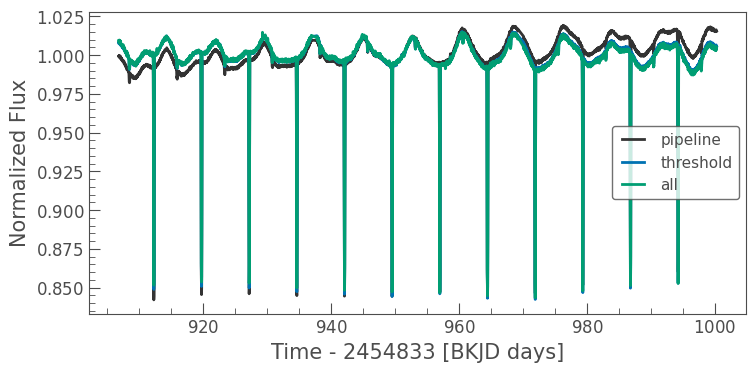

In [11]:
ax = tpf.to_lightcurve(aperture_mask = 'pipeline').normalize().plot(label='pipeline', linewidth=2);
tpf.to_lightcurve(aperture_mask = 'threshold').normalize().plot(ax=ax, label='threshold', linewidth=2);
tpf.to_lightcurve(aperture_mask = 'all').normalize().plot(ax=ax, label='all', linewidth=2);

In [13]:
tpf.create_threshold_mask();

In [15]:
custom_threshold_mask = tpf.create_threshold_mask(threshold=1)
custom_threshold_mask;

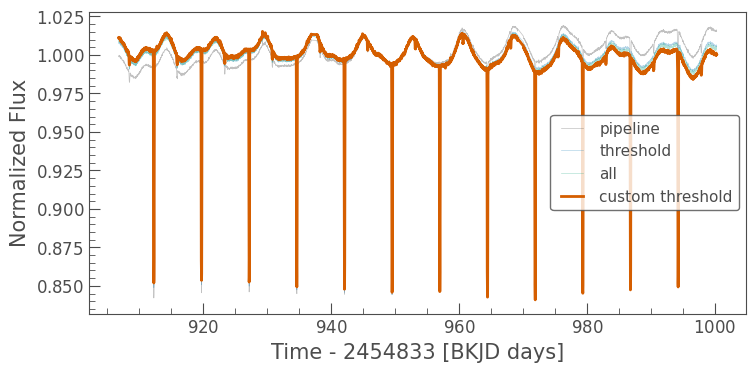

In [16]:
ax = tpf.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', alpha=.3)
tpf.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', alpha=.3)
tpf.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', alpha=.3)
tpf.to_lightcurve(aperture_mask=custom_threshold_mask).normalize().plot(ax=ax, label='custom threshold', linewidth=2);

2. Custom Aperture

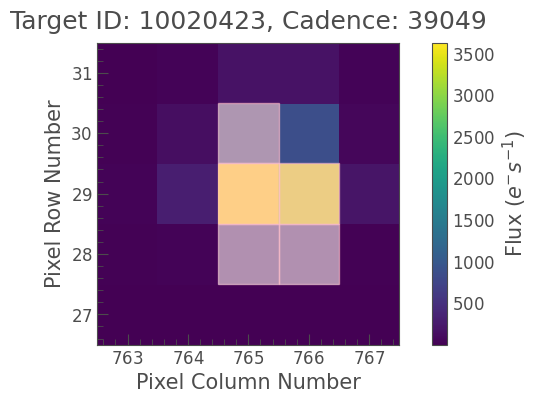

In [17]:
tpf = lk.search_targetpixelfile("KIC 10020423", mission="Kepler", cadence="long", quarter=10).download(quality_bitmask="hard")
tpf.plot(aperture_mask = 'pipeline');

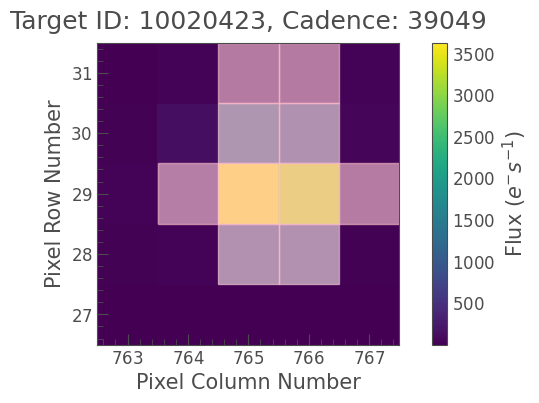

In [18]:
custom_mask = tpf.create_threshold_mask(threshold=1, reference_pixel=(7,7))
tpf.plot(aperture_mask=custom_mask);

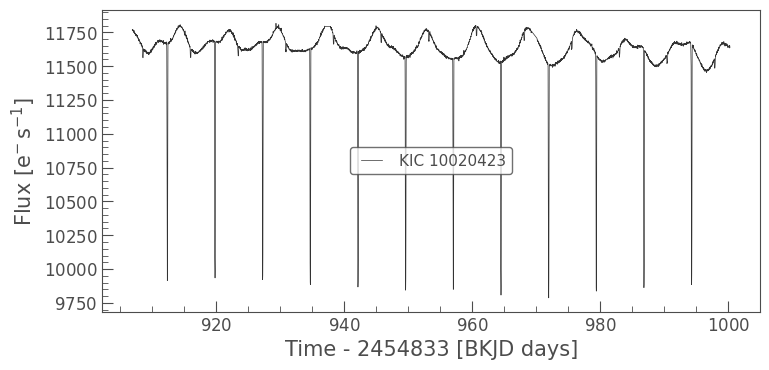

In [19]:
lc_background_star = tpf.to_lightcurve(aperture_mask=custom_mask)
lc_background_star.plot();

In [21]:
custom_mask = np.zeros((tpf[0].shape[1:]), dtype='bool')
custom_mask[-3:,5:] = True

custom_mask;

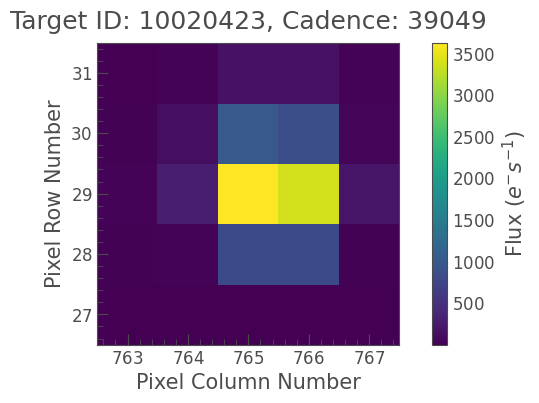

In [22]:
tpf.plot(aperture_mask=custom_mask);

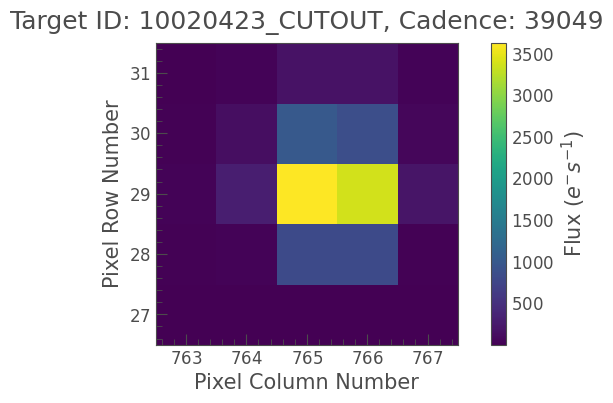

In [28]:
tpf_cut = tpf.cutout(center=(3,3))
tpf_cut.plot();

In [29]:
cut_mask = np.zeros(tpf_cut[0].shape[1:], dtype='bool')
cut_mask[:,1] = True
cut_mask[1,2] = True

cut_mask

array([[False,  True, False, False, False],
       [False,  True,  True, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False]])

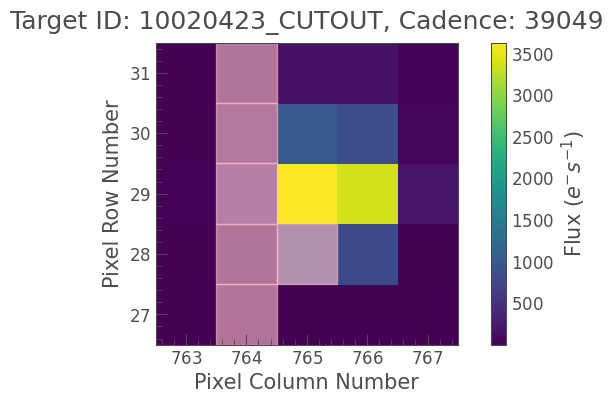

In [30]:
tpf_cut.plot(aperture_mask=cut_mask);

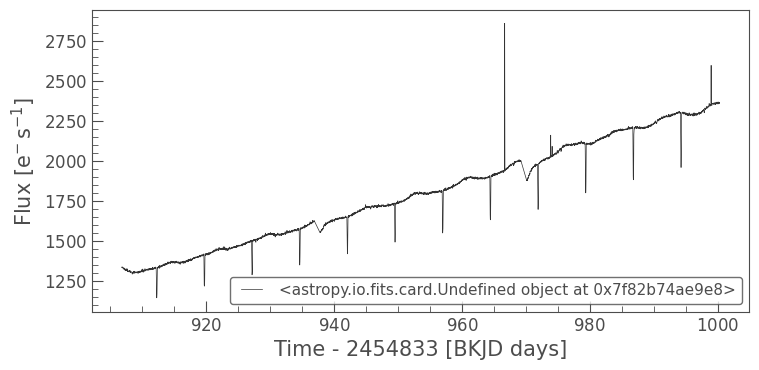

In [31]:
lc_background_star_cut = tpf_cut.to_lightcurve(aperture_mask=cut_mask)
lc_background_star_cut.plot();

**4)Instrumental noise in Kepler data**
